<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>

<b><font back = "Times New Roman" size = "5"><center>Escalamiento de Datos</center></font>
<div align="right"><font face = "Times New Roman" size = "2">Nombres:Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Karen Elizabeth González Santana</font></div>
</span></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
# --- Cargar CSV ---
df = pd.read_csv("datos_preprocessing_integration_tarea.csv")

df.columns

Index(['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c',
       'frecuencia_cardiaca', 'ciudad', 'tipo_servicio', 'nivel',
       'codigo_serie', 'referencia', 'sensor_defectuoso'],
      dtype='object')

In [3]:
df.shape

(500, 12)

In [4]:
df.head()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
0,39.0,NaN,174.287097,78.317375,NaN,76.552698,Puebla,basico,alto,Z,REF-964053,NaN
1,NaN,16048.0,168.917333,73.530586,36.332796,NaN,Puebla,estandar,medio,Y,REF-147729,NaN
2,44.0,41790.0,161.139089,94.093905,36.117298,96.188603,NaN,basico,alto,X,REF-867825,NaN
3,NaN,13803.0,160.267146,71.686776,36.251983,89.602824,Puebla,estandar,bajo,NaN,REF-406327,NaN
4,15.0,NaN,NaN,50.069666,NaN,64.701549,Guadalajara,estandar,alto,X,REF-159441,NaN


In [5]:
df.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,381.000000,405.000000,446.000000,434.000000,421.000000,378.000000,43.000000
mean,36.223097,21882.474860,167.991549,73.189043,36.682513,76.630167,-0.032688
std,15.056738,15714.795822,9.484114,13.525559,0.571884,12.114607,0.944514
min,15.000000,2016.000000,141.399431,40.000000,35.527677,41.661780,-3.110488
25%,27.000000,11741.000000,161.851488,64.283555,36.389489,67.873656,-0.446572
50%,34.000000,18065.000000,168.245734,73.738661,36.643309,76.025219,-0.017434
75%,42.000000,26300.000000,174.273273,82.493571,36.876278,85.000631,0.680576
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


In [6]:
df.describe(include='object')

,ciudad,tipo_servicio,nivel,codigo_serie,referencia
count,410,399,405,430,488
unique,5,3,3,3,488
top,CDMX,basico,medio,Z,REF-964053
freq,145,194,139,163,1


In [7]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=0)

In [8]:
X_train.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,288.000000,304.000000,339.000000,329.000000,316.000000,277.000000,35.000000
mean,36.673611,22433.165521,167.730403,73.082786,36.673234,77.279166,-0.080244
std,15.618416,16605.173891,9.707425,14.057501,0.512804,12.269605,1.018295
min,15.000000,2016.000000,141.399431,40.000000,35.633064,41.661780,-3.110488
25%,28.000000,12193.250000,161.533733,63.940191,36.418454,68.041915,-0.889859
50%,36.000000,18328.000000,167.600075,73.328873,36.657386,76.494160,-0.048844
75%,42.000000,26335.750000,174.283724,82.726023,36.872642,86.024524,0.914006
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


In [9]:
X_train

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
239,29.0,26353.0,148.464461,76.336147,36.604674,NaN,Guadalajara,premium,alto,Y,REF-931711,NaN
59,47.0,8994.0,NaN,90.857657,35.999930,NaN,Monterrey,estandar,bajo,Z,REF-621328,NaN
406,34.0,NaN,165.240909,62.802975,36.869138,67.820625,NaN,estandar,medio,Z,REF-836665,NaN
391,36.0,12392.0,153.280831,93.109140,NaN,72.465175,CDMX,estandar,bajo,X,REF-634251,NaN
411,15.0,48367.0,164.442803,65.844516,40.304299,75.631074,NaN,basico,alto,X,REF-891035,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
323,44.0,22413.0,171.392530,77.201260,37.118035,NaN,CDMX,basico,medio,Z,REF-268778,NaN
192,30.0,15862.0,170.943089,67.768850,36.276782,77.366502,NaN,basico,medio,X,REF-462559,-0.904089
117,101.0,24657.0,NaN,76.800702,36.339649,54.719026,CDMX,estandar,alto,Z,REF-869073,NaN
47,38.0,20149.0,165.509699,68.622610,NaN,85.926074,NaN,basico,medio,X,REF-616866,NaN


In [10]:
X_train.to_csv("datos_processing_integration_training.csv",index=True)

Columnas numéricas: ['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso']


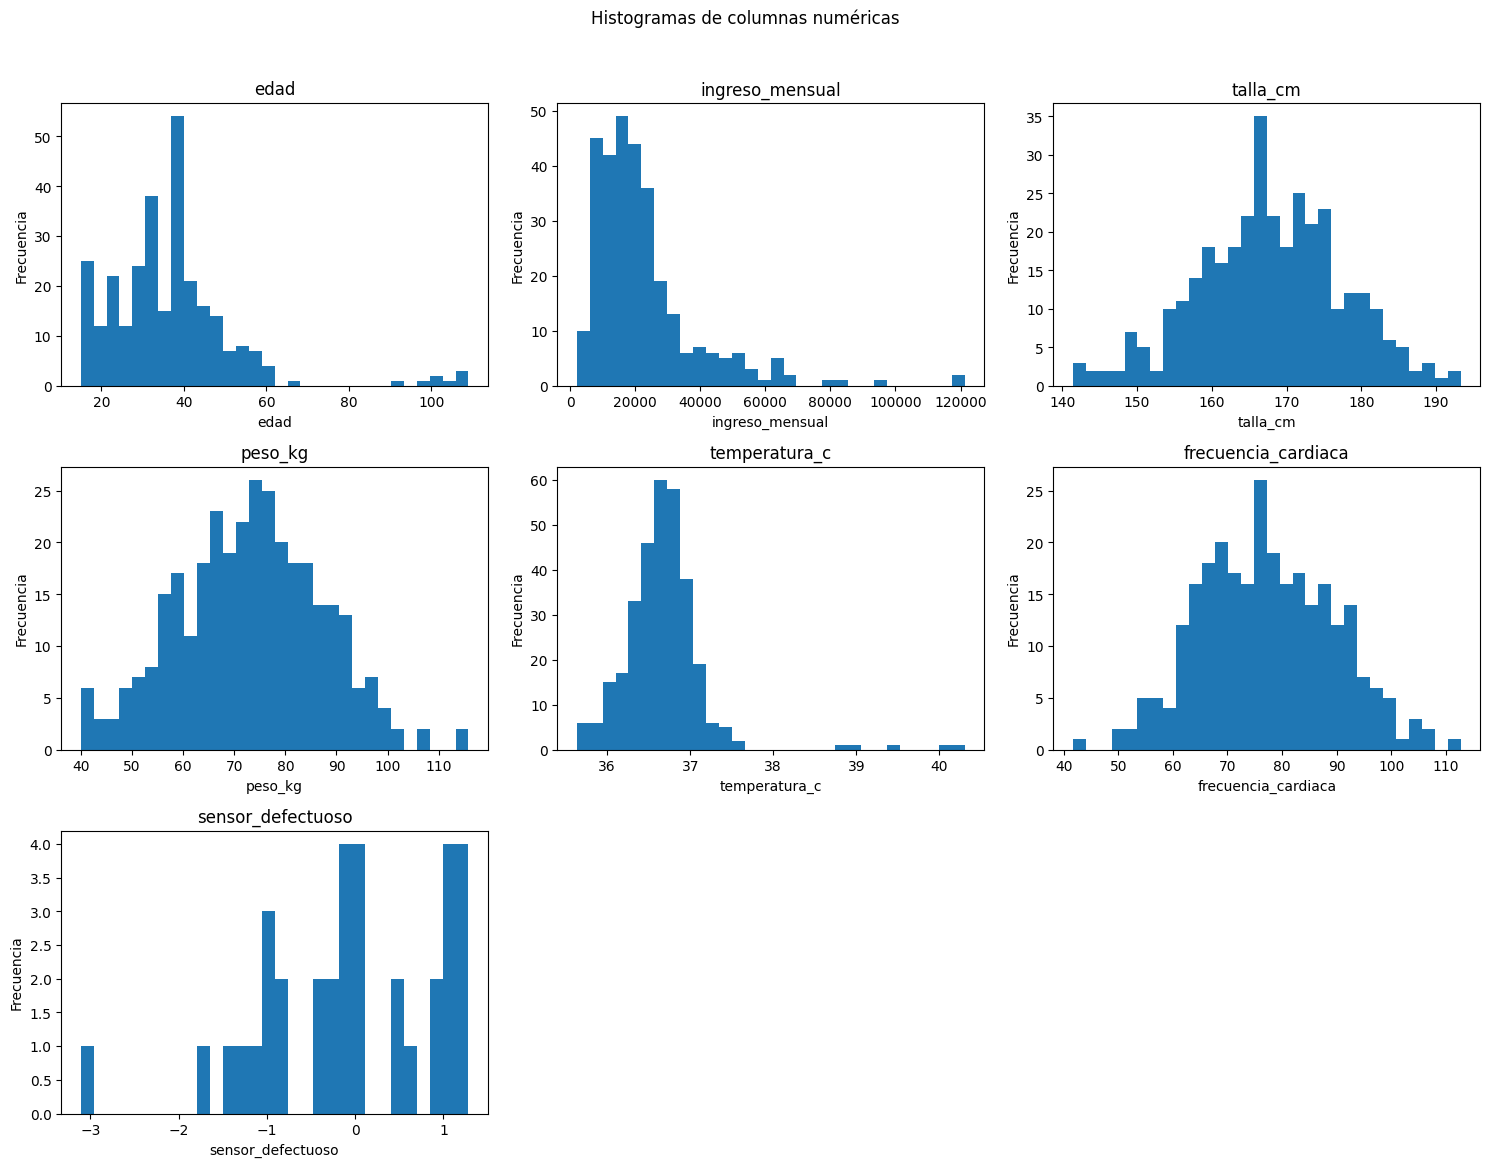

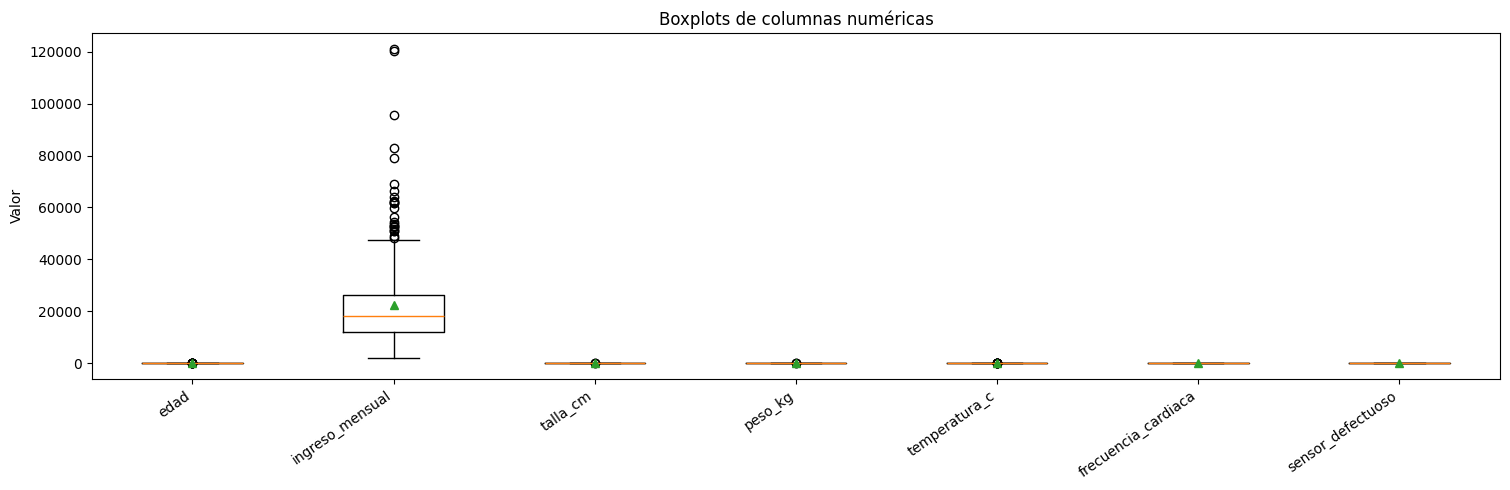

In [11]:
# 1) Separacion de Columnas Numericas
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", num_cols)

# 2) Definicion de Funciones Auxiliares
# Detection de outliers
def iqr_outlier_stats(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return 0, 0.0, np.nan, np.nan, np.nan, np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    number_outlier_detected = int(((s < lim_inf) | (s > lim_sup)).sum())
    proportion_outliers_respect_total = number_outlier_detected / len(s)

    return number_outlier_detected, proportion_outliers_respect_total, q1, q3, lim_inf, lim_sup

# Detecta si parece estar acotada en [0,1] o [0,100]
def bounded_guess(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return None
    min_value, max_value = float(s.min()), float(s.max())
    if 0.0 <= min_value and max_value <= 1.0:
        return "[0,1]"
    if 0.0 <= min_value and max_value <= 100.0:
        return "[0,100]"
    return None

if len(num_cols) == 0:
    print("No hay columnas numéricas en X_train.")
else:
    # --------- Figura 1: HISTOGRAMAS (todos en subplots) ----------
    n = len(num_cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()
    #Aplico Histograma y Box Plot a la parte de Entrenamiento
    for i, col in enumerate(num_cols):
        s = pd.to_numeric(X_train[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Oculta subplots sobrantes
    for j in range(len(num_cols), len(axes)):
        axes[j].axis("off")
    # Guarda Histograma
    fig.suptitle("Histogramas de columnas numéricas", y=1.02, fontsize=12)
    fig.tight_layout()
    fig.savefig("histogramas_numericas.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

    # --------- Figura 2: BOXPLOTS (todas en un eje) ----------
    series_pairs = []
    for c in num_cols:
        v = pd.to_numeric(X_train[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos numéricos válidos para boxplots. No se genera boxplot.")
        box_path = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots de columnas numéricas")
        plt.tight_layout()
        fig2.savefig("boxplots_numericas.png", dpi=150, bbox_inches="tight")
        plt.show()
        plt.close(fig2)
